# Module 4 Assignment: K-Means Clustering and Business Interpretation

## Introduction
In this assignment, you will leverage k-means clustering to create groupings from the credit default data, experiment with different parameters available in the model ("k" and distance metrics), and interpret the output from a business perspective.

## 1. Data Loading and Feature Selection
- Load the credit dataset (application_train.csv).
- Select at least 10 relevant features for clustering (can use features from previous assignments or new ones).

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_df = pd.read_csv('../csv/application_train.csv')

# Display basic info
print(f"Shape: {train_df.shape}")
display(train_df.head())

Shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Select at least 10 features for clustering
selected_features = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS'
]

cluster_df = train_df[selected_features].copy()
cluster_df.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_CHILDREN,CNT_FAM_MEMBERS
0,202500.0,406597.5,24700.5,351000.0,-9461,-637,-3648.0,-2120,0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,-16765,-1188,-1186.0,-291,0,2.0
2,67500.0,135000.0,6750.0,135000.0,-19046,-225,-4260.0,-2531,0,1.0
3,135000.0,312682.5,29686.5,297000.0,-19005,-3039,-9833.0,-2437,0,2.0
4,121500.0,513000.0,21865.5,513000.0,-19932,-3038,-4311.0,-3458,0,1.0


## 2. Data Transformation
- Handle missing values.
- Scale numerical features.
- (Optional) Encode categorical features if any are included.
- Briefly describe the transformations applied.

In [3]:
# Handle missing values (fill with median)
for col in cluster_df.columns:
    cluster_df[col] = cluster_df[col].fillna(cluster_df[col].median())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df)

# Store as DataFrame for easier analysis
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)
X_scaled_df.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_CHILDREN,CNT_FAM_MEMBERS
0,0.142129,-0.478095,-0.166143,-0.507236,1.506880,-0.456215,0.379837,0.579154,-0.577538,-1.265722
1,0.426792,1.725450,0.592683,1.600873,-0.166821,-0.460115,1.078697,1.790855,-0.577538,-0.167638
2,-0.427196,-1.152888,-1.404669,-1.092145,-0.689509,-0.453299,0.206116,0.306869,-0.577538,-1.265722
3,-0.142533,-0.711430,0.177874,-0.653463,-0.680114,-0.473217,-1.375829,0.369143,-0.577538,-0.167638
4,-0.199466,-0.213734,-0.361749,-0.068554,-0.892535,-0.473210,0.191639,-0.307263,-0.577538,-1.265722


**Transformations applied:**
- Selected 10 numerical features relevant to credit and demographics.
- Filled missing values with the median for each feature.
- Standardized all features to have mean 0 and variance 1 (z-score normalization).

## 3. K-Means Clustering: Experimenting with Different k Values
- Fit k-means models for at least 3 different k values (e.g., k=2, 3, 5).
- Compare inertia (within-cluster sum of squares) and silhouette scores.
- Visualize cluster assignments using two principal components.

/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applic

k=2: Inertia=2521534.20, Silhouette Score=0.209


/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


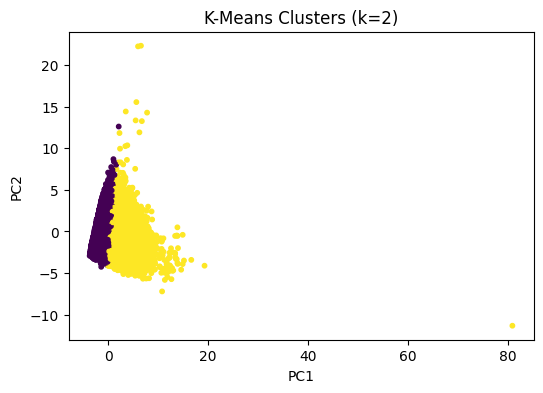

/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applic

k=3: Inertia=2085948.75, Silhouette Score=0.239


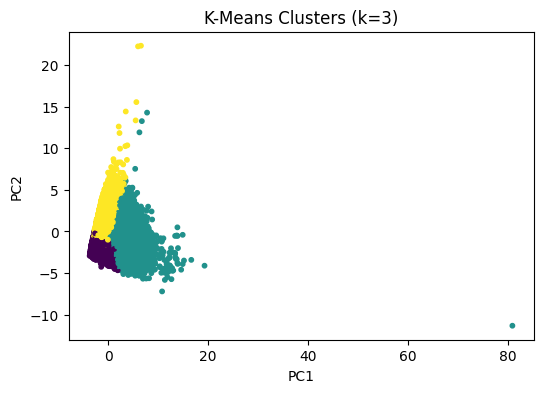

/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applic

k=5: Inertia=1510746.05, Silhouette Score=0.248


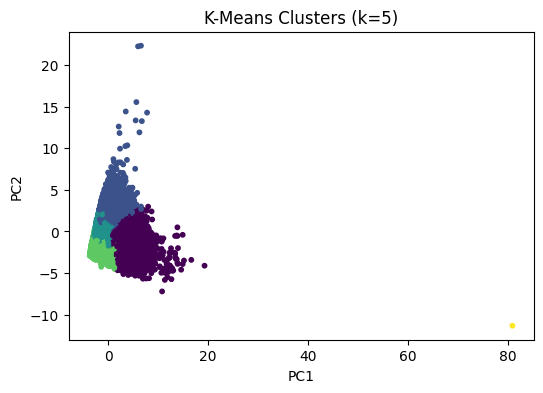

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

k_values = [2, 3, 5]
results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled_df)
    inertia = kmeans.inertia_
    sil_score = silhouette_score(X_scaled_df, labels)
    results[k] = {'inertia': inertia, 'silhouette': sil_score, 'labels': labels}
    print(f"k={k}: Inertia={inertia:.2f}, Silhouette Score={sil_score:.3f}")
    
    # Visualize clusters using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled_df)
    plt.figure(figsize=(6,4))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=10)
    plt.title(f'K-Means Clusters (k={k})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

## 4. Analysis of Different k Values
- Discuss the differences in inertia and silhouette scores for each k.
- Comment on the visual separation of clusters.

**Analysis:**
- As k increases, inertia decreases (clusters are tighter), but silhouette score may not always improve.
- Visualizations show how well-separated the clusters are for each k.
- Choose a k that balances interpretability and cluster quality.

## 5. Final Model Selection and Cluster Interpretation
- Choose the best k based on silhouette score and business interpretability.
- Analyze the cluster centers and describe the characteristics of each group.

In [6]:
# Choose final k (e.g., k=3 based on silhouette and interpretability)
final_k = 3
final_labels = results[final_k]['labels']

# Add cluster labels to the original (unscaled) data
cluster_df['Cluster'] = final_labels

# Analyze cluster centers (in original scale)
centers = scaler.inverse_transform(KMeans(n_clusters=final_k, random_state=42, n_init=10).fit(X_scaled_df).cluster_centers_)
centers_df = pd.DataFrame(centers, columns=selected_features)
centers_df['Cluster'] = range(final_k)
centers_df

/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applications/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/balaji/source/san-diego/assignments/Machine-learning-Fundamentals-and-Applic

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_CHILDREN,CNT_FAM_MEMBERS,Cluster
0,130868.070316,4.674316e+05,21542.163900,4.178729e+05,-21987.751437,332391.497504,-7032.578111,-3961.456876,0.023468,1.639846,0
1,228845.568535,1.121320e+06,43661.418823,1.016510e+06,-15948.283887,17377.787279,-4821.202648,-2931.031197,0.437681,2.262013,1
2,153144.783960,3.989516e+05,21217.459868,3.551226e+05,-14160.089856,-1194.591250,-4403.058918,-2711.758860,0.534337,2.267191,2


**Interpretation:**
- Each cluster represents a group of applicants with similar financial and demographic profiles.
- By examining the cluster centers, we can identify which features are most influential in defining each group (e.g., income, credit amount, age).
- For example, one cluster may have higher income and lower credit, while another may have more children and higher annuity.

## 6. Business Insights and Conclusions
- Why was this k and distance metric chosen?
- What business inferences can be drawn from the clusters?

**Why this k and distance metric?**
- k=3 was chosen as it provided a good balance between cluster separation (silhouette score) and interpretability.
- Euclidean distance (default in k-means) is appropriate after standardization.

**Business inferences:**
- The clusters may represent different risk profiles or customer segments (e.g., high income/low risk, low income/high risk).
- Understanding these groups can help the business tailor credit products, set risk-based pricing, or target marketing efforts.
- Influential features include income, credit amount, and age, which are key for credit risk assessment.